In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/animated-movies-imdb/TopAnimatedImDb.csv


In [2]:
dt = pd.read_csv('../input/animated-movies-imdb/TopAnimatedImDb.csv')

In [3]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        85 non-null     object 
 1   Rating       85 non-null     float64
 2   Votes        85 non-null     object 
 3   Gross        50 non-null     object 
 4   Genre        85 non-null     object 
 5   Metascore    80 non-null     float64
 6   Certificate  84 non-null     object 
 7   Director     85 non-null     object 
 8   Year         85 non-null     int64  
 9   Description  85 non-null     object 
 10  Runtime      85 non-null     object 
dtypes: float64(2), int64(1), object(8)
memory usage: 7.4+ KB


In [4]:
dt.head()

,Title,Rating,Votes,Gross,Genre,Metascore,Certificate,Director,Year,Description,Runtime
0,Sen to Chihiro no kamikakushi,8.6,"747,148",$10.06M,"Adventure, Family",96.0,U,Hayao Miyazaki,2001,"[""\nDuring her family's move to the suburbs, a...",125 min
1,The Lion King,8.5,"1,041,158",$422.78M,"Adventure, Drama",88.0,U,Roger Allers,1994,['\nLion prince Simba and his father are targe...,88 min
2,Hotaru no haka,8.5,"272,469",NaN,"Drama, War",94.0,U,Isao Takahata,1988,['\nA young boy and his little sister struggle...,89 min
3,Kimi no na wa.,8.4,"259,975",$5.02M,"Drama, Fantasy",79.0,U,Makoto Shinkai,2016,['\nTwo strangers find themselves linked in a ...,106 min
4,Spider-Man: Into the Spider-Verse,8.4,"510,227",$190.24M,"Action, Adventure",87.0,U,Bob Persichetti,2018,['\nTeen Miles Morales becomes the Spider-Man ...,117 min


In [5]:
def cleanGross(value):
    if str(value) == 'nan':
        return 0
    else:
        value = value[1:-1]
        value = float(value)*1000000
    return value

In [6]:
#Runtime
dt['Runtime (min)'] = dt['Runtime'].map(lambda e: e[:-4]).astype(int)
dt.drop('Runtime',axis=1,inplace=True)

#Votes
dt['Votes'] = dt['Votes'].replace(r'\D+', '', regex=True)
dt['Votes'] = dt['Votes'].fillna(0)
dt['Votes'] = dt['Votes'].astype(int)

#Gross
dt['Gross'] = dt['Gross'].map(lambda e: cleanGross(e))

In [7]:
dt.head()

,Title,Rating,Votes,Gross,Genre,Metascore,Certificate,Director,Year,Description,Runtime (min)
0,Sen to Chihiro no kamikakushi,8.6,747148,10060000.0,"Adventure, Family",96.0,U,Hayao Miyazaki,2001,"[""\nDuring her family's move to the suburbs, a...",125
1,The Lion King,8.5,1041158,422780000.0,"Adventure, Drama",88.0,U,Roger Allers,1994,['\nLion prince Simba and his father are targe...,88
2,Hotaru no haka,8.5,272469,0.0,"Drama, War",94.0,U,Isao Takahata,1988,['\nA young boy and his little sister struggle...,89
3,Kimi no na wa.,8.4,259975,5020000.0,"Drama, Fantasy",79.0,U,Makoto Shinkai,2016,['\nTwo strangers find themselves linked in a ...,106
4,Spider-Man: Into the Spider-Verse,8.4,510227,190240000.0,"Action, Adventure",87.0,U,Bob Persichetti,2018,['\nTeen Miles Morales becomes the Spider-Man ...,117


In [8]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          85 non-null     object 
 1   Rating         85 non-null     float64
 2   Votes          85 non-null     int64  
 3   Gross          85 non-null     float64
 4   Genre          85 non-null     object 
 5   Metascore      80 non-null     float64
 6   Certificate    84 non-null     object 
 7   Director       85 non-null     object 
 8   Year           85 non-null     int64  
 9   Description    85 non-null     object 
 10  Runtime (min)  85 non-null     int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 7.4+ KB


In [9]:
dt.nlargest(5,'Rating')

,Title,Rating,Votes,Gross,Genre,Metascore,Certificate,Director,Year,Description,Runtime (min)
0,Sen to Chihiro no kamikakushi,8.6,747148,10060000.0,"Adventure, Family",96.0,U,Hayao Miyazaki,2001,"[""\nDuring her family's move to the suburbs, a...",125
1,The Lion King,8.5,1041158,422780000.0,"Adventure, Drama",88.0,U,Roger Allers,1994,['\nLion prince Simba and his father are targe...,88
2,Hotaru no haka,8.5,272469,0.0,"Drama, War",94.0,U,Isao Takahata,1988,['\nA young boy and his little sister struggle...,89
3,Kimi no na wa.,8.4,259975,5020000.0,"Drama, Fantasy",79.0,U,Makoto Shinkai,2016,['\nTwo strangers find themselves linked in a ...,106
4,Spider-Man: Into the Spider-Verse,8.4,510227,190240000.0,"Action, Adventure",87.0,U,Bob Persichetti,2018,['\nTeen Miles Morales becomes the Spider-Man ...,117


<Figure size 1080x1440 with 0 Axes>

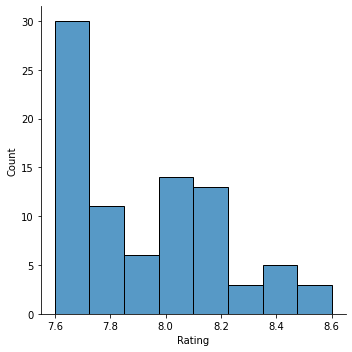

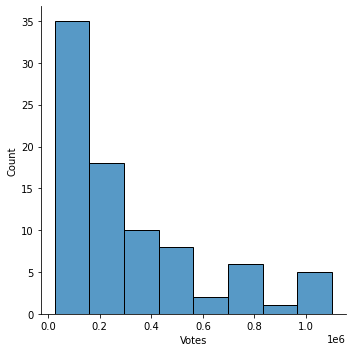

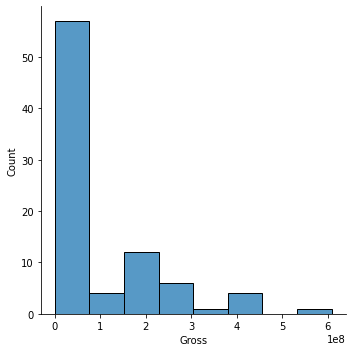

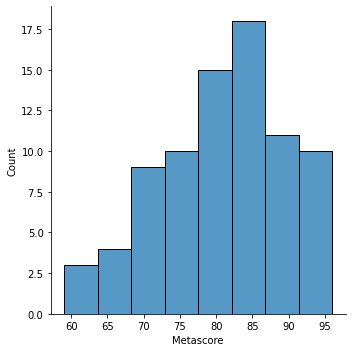

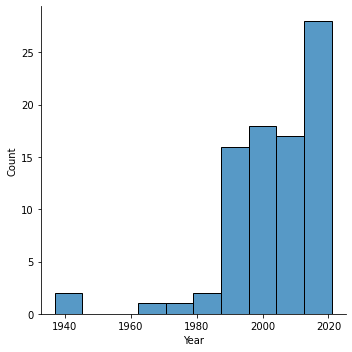

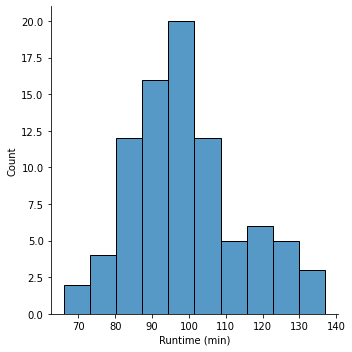

In [10]:
features = ['Rating','Votes','Gross','Metascore','Year','Runtime (min)']
plt.figure(figsize=(15,20))
for f in features:
    sns.displot(dt[f])
plt.show()

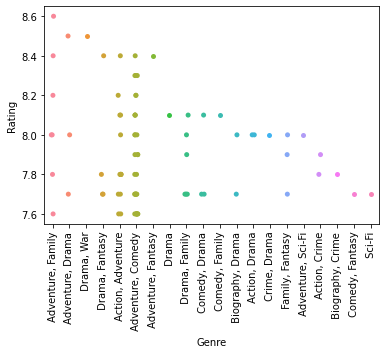

In [11]:
sns.stripplot(x='Genre',y='Rating',data=dt,jitter=True)
plt.xticks(rotation=90)
plt.show()

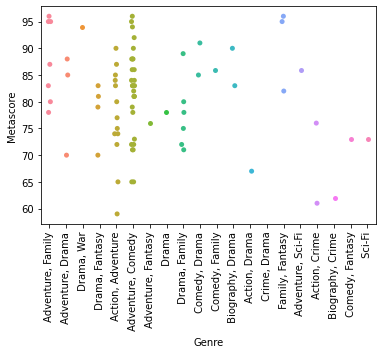

In [12]:
sns.stripplot(x='Genre',y='Metascore',data=dt,jitter=True)
plt.xticks(rotation=90)
plt.show()

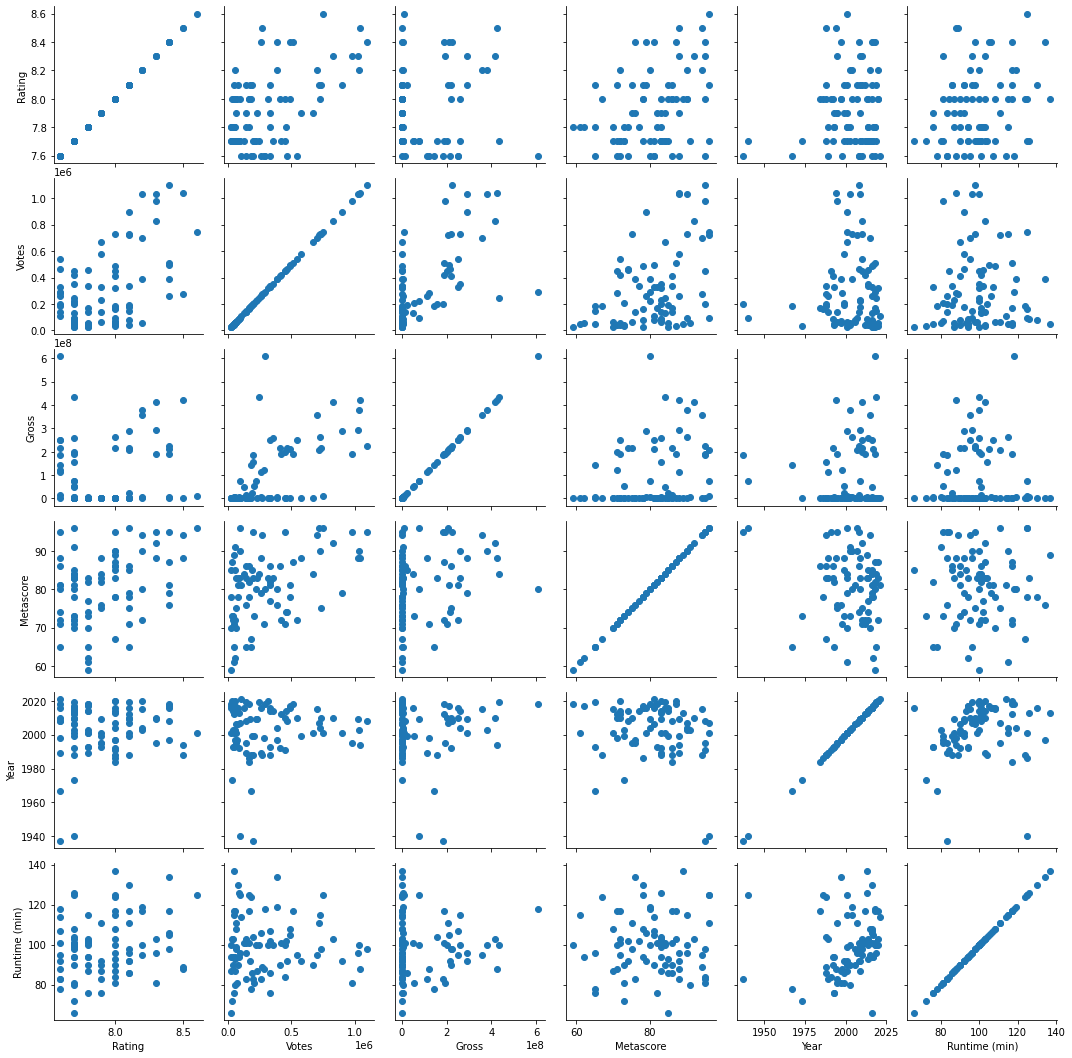

In [13]:
g = sns.PairGrid(dt)
g.map(plt.scatter)

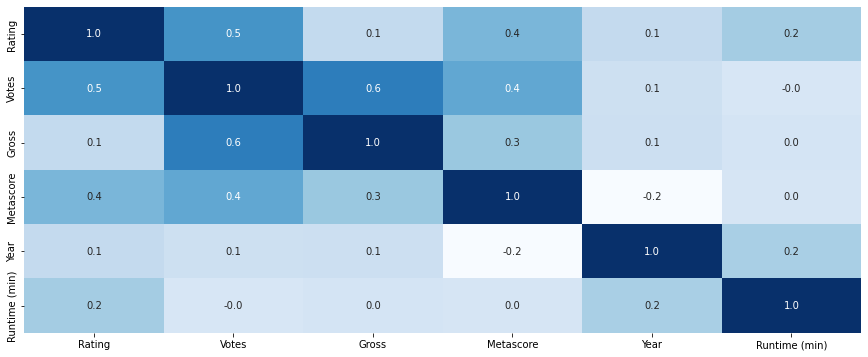

In [14]:
plt.figure(figsize=(15,6))
sns.heatmap(dt.corr(),annot=True,cbar=False,cmap='Blues',fmt='.1f')
plt.show()

From this EDA we can get some simple conclusions:
    
* The more votes, the more rating and the more gross.
* The year of the film doesn't seem to have any value on the Metascore Rating
* The strongest relation seems to be Gross - Votes (as the people who voted went to see the movie to the cinema)
* The genre with higher ratings seems to be Adventure,Family
* There's a tiny relationship between the runtime of films and the year.